In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Gathering

In [2]:
data = pd.read_csv('iris.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Data Pre-Processing

In [3]:
data.drop(['Id'], axis=1, inplace=True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Labeling

In [4]:
from sklearn.preprocessing import LabelEncoder

X = data[list(data.columns)[:-1]]
Y = data[list(data.columns)[-1]]

In [5]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
Y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

# Initialize Encoder

In [7]:
encoder = LabelEncoder()
encodedY = encoder.fit_transform(Y)
encodedY

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Scaling Features

In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
scaler.fit(X)
scaledX = scaler.transform(X)

mxscaler = MinMaxScaler()
scaledX = mxscaler.fit_transform(X)

# Split

In [9]:
from sklearn import model_selection

xtrain, xtest, ytrain, ytest = model_selection.train_test_split(
    scaledX, encodedY,
    test_size=0.2, random_state=3
)

# Modeling

In [10]:
from sklearn import ensemble

forest = ensemble.RandomForestClassifier(random_state=49)

# Train MOdel
forest.fit(xtrain, ytrain)

# Test Model
ypred = forest.predict(xtest)

ypred == ytest

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

# Evaluate

In [11]:
from sklearn.metrics import f1_score, confusion_matrix
print('Confusion Matrix: \n', confusion_matrix(ytest, ypred))
print('f1_score: ', f1_score(y_true=ytest, y_pred=ypred, average=None))

Confusion Matrix: 
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
f1_score:  [1. 1. 1.]


C:\Users\HASINUR PC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\HASINUR PC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


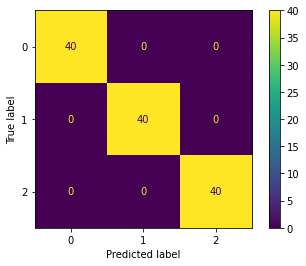

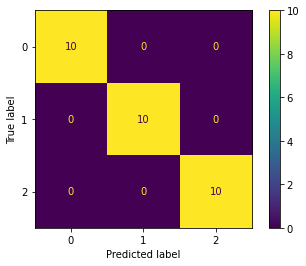

In [12]:
from sklearn import metrics

metrics.plot_confusion_matrix(forest, xtrain, ytrain)
metrics.plot_confusion_matrix(forest, xtest, ytest)

# Cross Validation

In [13]:
from sklearn.model_selection import cross_val_score

model = ensemble.RandomForestClassifier(random_state=49)

cv = cross_val_score(forest,scaledX,encodedY, cv=5, scoring='accuracy')

cv.mean()

0.9666666666666668

# Hyperparameter Tuning

In [14]:
from sklearn.model_selection import RandomizedSearchCV

gforest = ensemble.RandomForestClassifier(random_state=49)

gridTree = RandomizedSearchCV(
    gforest,
    param_distributions={
        'criterion': ['gini', 'entropy'],
        'n_estimators': list(range(100,3001,100)),
        'max_depth' : list(range(5,50,3)),
        'min_samples_split': list(range(2,40,2)),
        'max_features': [None, 'auto', 'sqrt', 'log2'],
        'bootstrap': [True, False],
        'warm_start': [True, False]
    },
    cv = 5, scoring='accuracy', n_iter=100, n_jobs = -1, verbose=3
)
gridTree.fit(xtrain, ytrain)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=49),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 8, 11, 14, 17, 20, 23,
                                                      26, 29, 32, 35, 38, 41,
                                                      44, 47],
                                        'max_features': [None, 'auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [2, 4, 6, 8, 10,
                                                              12, 14, 16, 18,
                                                              20, 22, 24, 26,
                                                              28, 30, 32, 34,
                                                              

In [15]:
gridTree.best_params_

{'warm_start': True,
 'n_estimators': 600,
 'min_samples_split': 30,
 'max_features': 'auto',
 'max_depth': 20,
 'criterion': 'entropy',
 'bootstrap': True}

In [16]:
Forest = ensemble.RandomForestClassifier(
    warm_start = True,
    n_estimators = 1300,
    min_samples_split = 28,
    max_features = 'auto',
    max_depth = 26,
    criterion = 'gini',
    bootstrap = True,
    random_state=49
)

Forest.fit(xtrain, ytrain)

ypred = Forest.predict(xtest)

ypred == ytest
yhat = np.argmax(Forest.predict_proba(xtest)[21])
encoder.inverse_transform(ypred)


array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor'], dtype=object)

C:\Users\HASINUR PC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\HASINUR PC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


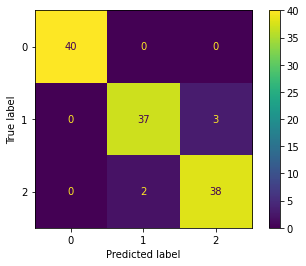

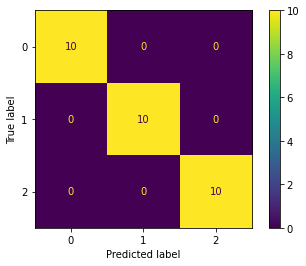

In [17]:
metrics.plot_confusion_matrix(Forest, xtrain, ytrain)
metrics.plot_confusion_matrix(Forest, xtest, ytest)

# Analyssis

C:\Users\HASINU~1\AppData\Local\Temp/ipykernel_10496/2278141441.py:27: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, z)


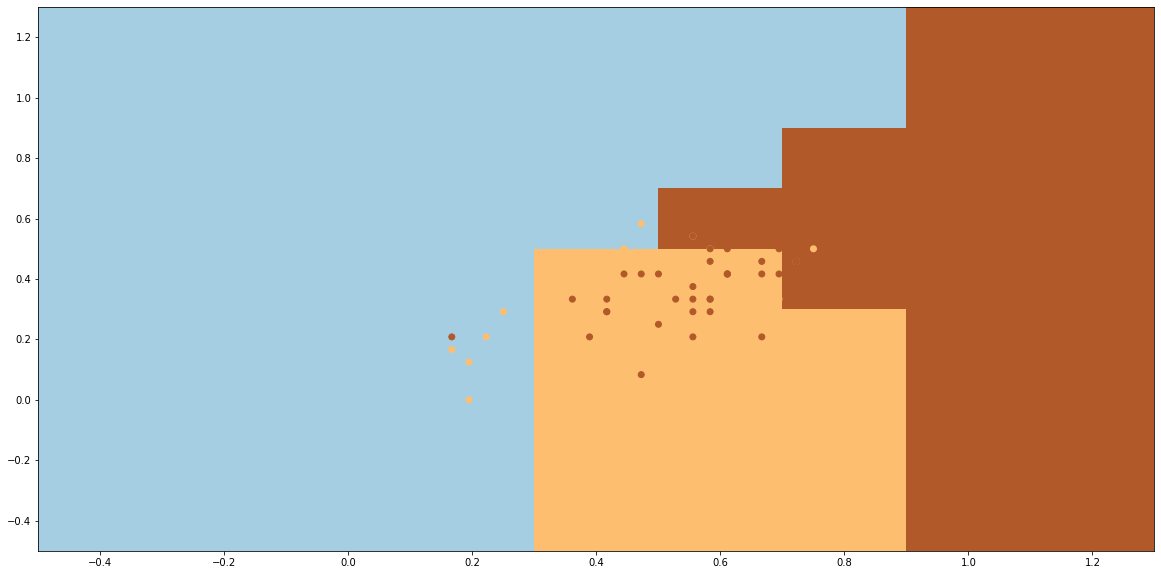

In [18]:
Forest = ensemble.RandomForestClassifier(
    warm_start = True,
    n_estimators = 1300,
    min_samples_split = 28,
    max_features = 'auto',
    max_depth = 26,
    criterion = 'gini',
    bootstrap = True,
    random_state=49
)

Forest.fit(scaledX[:, :2], encodedY)

xmin, xmax = scaledX[:, :2][:,0].min() - .5, scaledX[:, :2][:,0].max() + .5
ymin, ymax = scaledX[:, :2][:,1].min() - .5, scaledX[:, :2][:,1].max() + .5

xx, yy = np.meshgrid(
    np.arange(xmin, xmax, 0.2), np.arange(ymin, ymax, 0.2)
)
z = Forest.predict(np.c_[xx.ravel(), yy.ravel()])
z

# color
z = z.reshape(xx.shape)
plt.figure(1, figsize=(20,10))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, z)

# plot
plt.scatter(scaledX[:,:2][:,0], scaledX[:, :2][:, 1], c=encodedY)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

# PipeLine Create

In [20]:
from sklearn import pipeline

classifier = ensemble.RandomForestClassifier(
    warm_start = True,
    n_estimators = 1300,
    min_samples_split = 28,
    max_features = 'auto',
    max_depth = 26,
    criterion = 'gini',
    bootstrap = True,
    random_state=49
)

pipe = pipeline.Pipeline(
    [
        ('scaler', MinMaxScaler()),
        ('forest', classifier)
    ]
)

pipe.fit(xtrain, ytrain)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('forest',
                 RandomForestClassifier(max_depth=26, min_samples_split=28,
                                        n_estimators=1300, random_state=49,
                                        warm_start=True))])

In [24]:
data.iloc[0]

SepalLengthCm            5.1
SepalWidthCm             3.5
PetalLengthCm            1.4
PetalWidthCm             0.2
Species          Iris-setosa
Name: 0, dtype: object

In [25]:
data.iloc[0].values

array([5.1, 3.5, 1.4, 0.2, 'Iris-setosa'], dtype=object)

In [26]:
xtrain

array([[0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.13888889, 0.58333333, 0.15254237, 0.04166667],
       [0.72222222, 0.45833333, 0.74576271, 0.83333333],
       [0.63888889, 0.375     , 0.61016949, 0.5       ],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.25      , 0.625     , 0.08474576, 0.04166667],
       [0.66666667, 0.41666667, 0.6779661 , 0.66666667],
       [0.05555556, 0.125     , 0.05084746, 0.08333333],
       [0.58333333, 0.29166667, 0.72881356, 0.75      ],
       [0.52777778, 0.08333333, 0.59322034, 0.58333333],
       [0.58333333, 0.33333333, 0.77966102, 0.83333333],
       [0.41666667, 0.29166667, 0.49152542, 0.45833333],
       [0.08333333, 0.66666667, 0.        , 0.04166667],
       [0.22222222, 0.625     , 0.06779661, 0.08333333],
       [0.5       , 0.41666667, 0.66101695, 0.70833333],
       [0.58333333, 0.5       , 0.59322034, 0.58333333],
       [0.22222222, 0.54166667, 0.11864407, 0.16666667],
       [0.47222222, 0.29166667,

In [29]:
features = data.iloc[np.random.randn[99:102, 0:-1].values

In [31]:
features = data.iloc[0, 0:-1].values
np.random.randint(0,149, 3)

array([138, 126,  53])

In [35]:
indices = np.random.randint(0,149, 3)
features = data.iloc[indices, 0:-1].values
features

array([[6.3, 3.3, 4.7, 1.6],
       [5.7, 2.8, 4.1, 1.3],
       [5. , 3.2, 1.2, 0.2]])

In [36]:
pipe.predict(features)

array([2, 2, 0])

In [37]:
ypred = pipe.predict(features)

In [38]:
encoder.inverse_transform(ypred)

array(['Iris-virginica', 'Iris-virginica', 'Iris-setosa'], dtype=object)

In [39]:
data.iloc[indices].values

array([[6.3, 3.3, 4.7, 1.6, 'Iris-versicolor'],
       [5.7, 2.8, 4.1, 1.3, 'Iris-versicolor'],
       [5.0, 3.2, 1.2, 0.2, 'Iris-setosa']], dtype=object)

In [40]:
xx.shape

(10, 10)

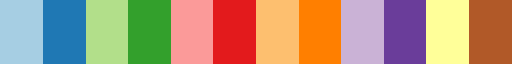

In [41]:
plt.cm.Paired